In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd

In [2]:
f = open('/Additional_Experiments/Appendix_E/uncertainty_results/cal_metrics_improved_model.json')

data_improved_model = json.load(f)

f.close()

### Total Variation Distance

In [3]:
print('Altered TVD metrics (mean, st. dev., min, max)')
for key in data_improved_model.keys():
    print('Proportion of changed model samples:', key)
    tvd_biased_array = np.array(data_improved_model[key]['tvd_biased'])
    np.mean(tvd_biased_array), np.std(tvd_biased_array), np.min(tvd_biased_array), np.max(tvd_biased_array)
    print('Unbiased dist. and human maj. as truth', np.mean(tvd_biased_array), np.std(tvd_biased_array), np.min(tvd_biased_array), np.max(tvd_biased_array))

Altered TVD metrics (mean, st. dev., min, max)
Proportion of changed model samples: 0
Unbiased dist. and human maj. as truth 0.6331934246568682 0.22089438887639298 0.000292544427793473 0.9999185800552368
Proportion of changed model samples: 0.1
Unbiased dist. and human maj. as truth 0.6026873076694997 0.22971311164595823 0.0 0.9999185800552368
Proportion of changed model samples: 0.2
Unbiased dist. and human maj. as truth 0.5869336528015662 0.23555077210305986 0.0 0.9999185800552368
Proportion of changed model samples: 0.3
Unbiased dist. and human maj. as truth 0.562483448954671 0.23849735463276583 0.0009161029593087733 0.9999185800552368
Proportion of changed model samples: 0.4
Unbiased dist. and human maj. as truth 0.5534776900963587 0.23708998326845196 0.000292544427793473 0.9999185800552368
Proportion of changed model samples: 0.5
Unbiased dist. and human maj. as truth 0.5157646273053423 0.22901880170271885 0.0 0.9998108148574829
Proportion of changed model samples: 0.6
Unbiased di

In [3]:
tvd_biased = {}
tvd_unbiased = {}
ent_diff_biased = {}
ent_diff_unbiased = {}
for proportion in data_improved_model.keys():
    for metric in data_improved_model[str(proportion)].keys():
        if metric == 'tvd_biased':
            tvd_biased[proportion] = data_improved_model[str(proportion)][metric]
        elif metric == 'tvd_unbiased':
            tvd_unbiased[proportion] = data_improved_model[str(proportion)][metric]
        elif metric == 'ent_diff_biased':
            ent_diff_biased[proportion] = data_improved_model[str(proportion)][metric]
        else:
            ent_diff_unbiased[proportion] = data_improved_model[str(proportion)][metric]

In [4]:
def convert_to_list(dict_metric):
    list_change = []
    list_metric = []
    for key in dict_metric.keys():
        for i in range(len(dict_metric[key])):
            list_change.append(key)
            list_metric.append(dict_metric[key][i])
    return list_change, list_metric

In [5]:
list_change, list_metric = convert_to_list(tvd_biased)
df_tvd_biased = pd.DataFrame({'change': list_change, 'value': list_metric})

In [6]:
#same graph for 0, 0.2, 0.4, 0.6, 0.8, 1
compressed_tvd_biased = df_tvd_biased[((df_tvd_biased['change'] == '0') | (df_tvd_biased['change'] == '0.2') | (df_tvd_biased['change'] == '0.4') | (df_tvd_biased['change'] == '0.6') | (df_tvd_biased['change'] == '0.8') | (df_tvd_biased['change'] == '1'))]


In [8]:
list_change, list_metric = convert_to_list(tvd_unbiased)
df_tvd_unbiased = pd.DataFrame({'change': list_change, 'value': list_metric})

In [9]:
#same graph for 0, 0.2, 0.4, 0.6, 0.8, 1
compressed_tvd_unbiased = df_tvd_unbiased[((df_tvd_unbiased['change'] == '0') | (df_tvd_unbiased['change'] == '0.2') | (df_tvd_unbiased['change'] == '0.4') | (df_tvd_unbiased['change'] == '0.6') | (df_tvd_unbiased['change'] == '0.8') | (df_tvd_unbiased['change'] == '1'))]


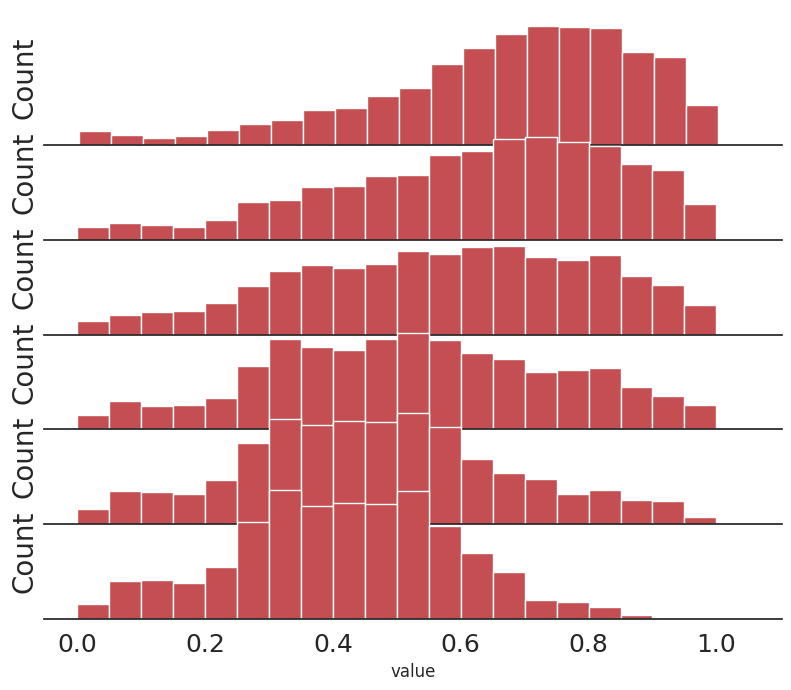

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
d = {'color': ['r', 'b', 'c', 'm', 'y', 'g']}

palette = sns.color_palette("Set2", 16)

g = sns.FacetGrid(compressed_tvd_unbiased, palette = palette, row="change", aspect=7, height=1.2, hue_kws=d)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1,  binwidth=0.05)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.3)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

#g.set_xlabels("TVD Histograms with k% induced model TVD values with oracle's",fontsize=40)
g.set_ylabels("Count",fontsize=20)
g.tick_params(labelsize=18)